# Projeto Semestral EFB803

## Turma 2-Barril

> Guilherme de Campos - RA: 20.00089-8

> Leonardo Campos da Costa  -  RA: 20.00786-8

> Luis Guilherme de Souza Munhoz - RA: 20.01937-8

> Enrico Giannobile - RA: 19.00610-0

## Importado dados dos .csv(s)
- estes dados foram recolidos do forms

In [42]:

!pip install nbformat 
import plotly.express as px
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable


In [43]:

#pip install pandas
#pip install numpy

import pandas as pd
import numpy as np
import math
import seaborn as sns

data=pd.read_csv('Serviços de assinaturas de jogos - Pesquisa .csv')
gringoData=pd.read_csv('INGLES Serviços de assinaturas de jogos.csv')
original=len(data)


## Primeira analise dos dados
- dados brasileiros
- dados estrangeiros


In [44]:
data.head(1)

,Carimbo de data/hora,Qual é sua idade?,Qual é seu gênero?,Qual é sua ocupação?,Qual é seu estado civil?,Qual é seu nível de inglês?,Têm filhos?,Você joga vídeogames?,Quanto(s) jogos você comprou nos últimos 3 meses?,Qual(is) seu(s) gêneros de jogo favorito?,Prefere jogos em qual mídia?,Qual(is) desse(s) critério(s) você considera importante ao comprar um jogo?,Assina algum serviço de assinatura de jogos?,Qual(is)?,Quanto pagaria em um serviço de assinatura de jogos por mês em (R$)?
0,2022/05/12 4:26:30 PM GMT-3,20,Feminino,Estudante,Solteira(o),Fluente,Não,Sim,0.0,Ação/Aventura,Mídia digital,Indiferente,Não,NaN,Não pagaria


In [45]:
gringoData.head(1)

,Carimbo de data/hora,How old are you?,What's your gender?,What's your occupation?,What's your marital status?,What's your level of English?,Do you have kids?,Do you play videogames?,How many games did you bought in the last 3 mounts?,Which are your favorite game genre?,Which type of media do you prefer?,Which criteria do you consider before buying a game?,Do you pay for any game membership?,Which of the following?,How much would you pay for a monthly game membership USD($)?
0,2022/05/15 4:06:23 PM GMT-3,19,Masculine,Student,Single,Fluent,No,Yes,4,Action/Adventure;Race;FPS;Fighting game;RPG,Digital media,Sale;Price;Quality,No,NaN,Wouldn't pay


### Renomeando os titulos

In [46]:
if(data.columns[0]=='Carimbo de data/hora'):
    data.drop("Carimbo de data/hora", axis=1, inplace=True)
    gringoData.drop("Carimbo de data/hora", axis=1, inplace=True)
    print("removido")

removido


In [47]:
titulos=['idade', 
        'genero',
       'ocupacao',
        'estado',# estado civil
       'ingles', # nivel de ingles
       'filhos', # tem filhos
       'joga',   #joga videogames?
       'quant_jogos',#quantos jogos voce comprou?
       'fav_jogos',#titulo favorito                                              (falta traduzir os titulos)
       'midia',     #prefere qual midia de jogos (fisica/digita)
       'importante_jogo',
       'assina', 
       'quais',#o que assina 
       'paga' # quanto ira pagar
       ]



- O tempo e hora da resposta é irrelevante para a pequisa entao iremos removelos

>- Como temos dados em duas linguas iremos traduzir as perguntas e dados para o PORTUGUES


## Traduzindo os dados

In [48]:
data.columns=titulos
gringoData.columns=titulos
print(data.columns==gringoData.columns)
data.head(1)
#verifica se os titulos sao iguais

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga
0,20,Feminino,Estudante,Solteira(o),Fluente,Não,Sim,0.0,Ação/Aventura,Mídia digital,Indiferente,Não,NaN,Não pagaria


### Analize de respostas para o dicionario


In [49]:
i=1
while i<8:
    
    print(data[titulos[i]].unique())
    i=i+1

i=9
while i<len(gringoData.columns):
    
    print(data[titulos[i]].unique())
    i=i+1

print("\n")


    


['Feminino' 'Masculino' 'Outros' 'Prefiro não informar']
['Estudante' 'Desempregado' 'Estudante;Desempregado'
 'Estudante;Trabalhador' 'Estudante;ASTROFISICO' 'Autônomo/Freelacer'
 'Trabalhador' 'Advogada' 'Aposentado' 'Empresario' 'Registrador Civil'
 'Aposentado;Trabalhador' 'Empreendedor']
['Solteira(o)' 'Casada(o)' 'Separada(o)' 'Viúva(o)']
['Fluente' 'Intermediário' 'Avançado' 'Básico' 'Nenhum']
['Não' 'Sim']
['Sim' 'Não']
[ 0.  1.  3. nan  4. 12.  9. 19.  2.  5. 11. 16.  6.]
['Mídia digital' 'Mídia física' 'Indiferente' nan]
['Indiferente' 'Desconto;Duração;Preço;Qualidade'
 'Duração;Preço;Qualidade' 'Desconto;Preço;Qualidade' nan 'Qualidade'
 'Desconto;Qualidade' 'Duração;Qualidade' 'Preço;Qualidade'
 'Qualidade;Indiferente' 'Desconto;Duração;Preço;Qualidade;Indiferente'
 'Desconto' 'Desconto;Duração;Qualidade' 'Desconto;Duração' 'Preço'
 'Desconto;Preço']
['Não' 'Sim' nan]
[nan
 'Game Pass;Prime gaming, epic games (não é pago, mas da jogos gratuitos)'
 'Game Pass' 'Game Pass;Pl

In [50]:
i=1
while i<8:
    
    print(gringoData[titulos[i]].unique())
    i=i+1

i=9
while i<len(gringoData.columns):
    
    print(gringoData[titulos[i]].unique())
    i=i+1

['Masculine' 'Feminine']
['Student' 'Employed' 'Unemployed']
['Single' 'Married']
['Fluent' "I'm a native English speaker" 'Advanced']
['No' 'Yes']
['Yes']
[4 3 1 5 2 0]
['Digital media' 'Physical media' 'Indifferent']
['Sale;Price;Quality' 'Price;Quality' 'Duration;Price;Quality' 'Quality'
 'Duration' 'Indifferent']
['No' 'Yes']
[nan 'Playstation Plus'
 'Game Pass;Nintendo Switch Online;Playstation Plus' 'Game Pass'
 'EA Access/Origin Access;Game Pass']
["Wouldn't pay" '1 a 10' '10 a 30' '30 a 50']


### Dicionario

#### Categoria geral - dicionario


In [51]:
tradutor={
'Masculine':'Masculino',
'Feminine' : 'Feminino',
'Other'    :  'Outro',
'I prefer to not inform'         :  'Prefiro não informar',
'Student'   :   'Estudante',
'Unemployed':   'Desempregado',
'Employed':   'Trabalhador',
'Single'    :  'Solteira(o)',
'Maried'    :   'Casada(o)',
'Fluent'    : "Fluente",
"I'm a native English speaker"  : 'Tenho ingles nativo',
'Advanced'  :   'Avançado',
'No'        :   'Não',
'Yes'       :   'Sim',
'Digital media' :   'Mídia digital',
'Physical media':   'Mídia física',
'Indifferent'   :   'Indiferente',
"Wouldn't pay"  :   'Não pagaria',
'1 a 10'    :   '1 a 10 DOLAR',
'10 a 30'    :   '10 a 30 DOLAR',
'30 a 50'    :   '30 a 50 DOLAR',
'50 a 70'    :   '50 a 70 DOLAR',
'70 a 100'    :   '70 a 100 DOLAR',

}
gringoData=gringoData.replace(tradutor)
gringoData.head(3)

,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga
0,19,Masculino,Estudante,Solteira(o),Fluente,Não,Sim,4,Action/Adventure;Race;FPS;Fighting game;RPG,Mídia digital,Sale;Price;Quality,Não,NaN,Não pagaria
1,17,Masculino,Estudante,Solteira(o),Tenho ingles nativo,Não,Sim,3,Strategy;RPG,Mídia digital,Price;Quality,Não,NaN,Não pagaria
2,18,Masculino,Estudante,Solteira(o),Tenho ingles nativo,Não,Sim,1,Action/Adventure;Fighting game,Mídia física,Duration;Price;Quality,Sim,Playstation Plus,1 a 10 DOLAR


#### Categoria jogos - dicionario

In [52]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text


jogos={
    'Action/Adventure'  : 'Ação/Aventura',
    'Race'              : 'Corrida',
    'Sport'             : 'Esporte',
    'Strategy'          : 'Estrategia',
    'Fighting game'     : 'Luta',
    'Simulation'        : 'Simulação',
    'Horror'            :  'Terror'

}


i=0

while i<len(gringoData):

    txt=gringoData['fav_jogos'][i]
    x = replace_all(txt, jogos)
    gringoData['fav_jogos']=gringoData['fav_jogos'].replace(gringoData['fav_jogos'][i],x)
    i=i+1

gringoData['fav_jogos']



0                    Ação/Aventura;Corrida;FPS;Luta;RPG
1                                        Estrategia;RPG
2                                    Ação/Aventura;Luta
3       Ação/Aventura;Battle Royale;Esporte;Luta;Terror
4                                              FPS;Luta
5                              Ação/Aventura;Estrategia
6     Ação/Aventura;Estrategia;FPS;RPG;Simulação;Ter...
7                   Ação/Aventura;MOBA;Simulação;Terror
8                                                   FPS
9     Ação/Aventura;Battle Royale;Corrida;Estrategia...
10                           Ação/Aventura;FPS;MOBA;RPG
11                         Ação/Aventura;Estrategia;FPS
12                                                  RPG
Name: fav_jogos, dtype: object

In [53]:
criterios={
    'Sale'          :   'Desconto',
    'Duration'      :   'Duração',
    'Price'         :   'Preço',
    'Quality'       :   'Qualidade',
    'Indifferent'   :   'Indiferente',

}


i=0

while i<len(gringoData):

    txt=gringoData['importante_jogo'][i]
    x = replace_all(txt, criterios)
    gringoData['importante_jogo']=gringoData['importante_jogo'].replace(gringoData['importante_jogo'][i],x)
    i=i+1

gringoData['importante_jogo']

0     Desconto;Preço;Qualidade
1              Preço;Qualidade
2      Duração;Preço;Qualidade
3                    Qualidade
4                    Qualidade
5                      Duração
6     Desconto;Preço;Qualidade
7              Preço;Qualidade
8                    Qualidade
9              Preço;Qualidade
10                 Indiferente
11             Preço;Qualidade
12                   Qualidade
Name: importante_jogo, dtype: object

## Filtrando dados gerais e nan
- sim = 0
- nao = 1
- nan = -1
- adicionar um count

In [54]:
if(len(data)==original):
    data=data.append(gringoData, ignore_index=True)#lembra de excluir o gringoData 

data['quais'] = data['quais'].replace(np.nan, -1)
i=0
while i<len(titulos):
    data[titulos[i]] = data[titulos[i]].replace(np.nan, -1)#arrumar(n_joga aparece)
    data[titulos[i]] = data[titulos[i]].replace('Não', 0)
    data[titulos[i]] = data[titulos[i]].replace('Sim', 1)
    i+=1

C:\Users\guerr\AppData\Local\Temp\ipykernel_4236\2602603311.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



#### Adicionando um count para criacao de graficos

In [55]:
count=np.ones(len(data))
data['count']=count
data.tail(3)

,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga,count
164,18,Masculino,Desempregado,Solteira(o),Tenho ingles nativo,0,1,4.0,Ação/Aventura;FPS;MOBA;RPG,Indiferente,Indiferente,1,EA Access/Origin Access;Game Pass,30 a 50 DOLAR,1.0
165,14,Masculino,Estudante,Solteira(o),Tenho ingles nativo,0,1,5.0,Ação/Aventura;Estrategia;FPS,Indiferente,Preço;Qualidade,1,Game Pass,1 a 10 DOLAR,1.0
166,19,Masculino,Trabalhador,Solteira(o),Tenho ingles nativo,0,1,0.0,RPG,Mídia digital,Qualidade,1,Game Pass,10 a 30 DOLAR,1.0


## Funções de graficos

In [56]:
def plot_bar(data,variable):
    varValue=data[variable].value_counts()
    
    plt.figure(figsize = (9,5))
    plt.bar(varValue.index, varValue,color="#A984EA",ec="#7332D6")
    plt.xticks(varValue.index, varValue.index.values)#o que isso siguinifica?? socorro
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()


In [57]:
def plot_hist(data,variable):
    varValue=data[variable].value_counts()

    plt.figure(figsize = (9,5))
    plt.hist(data[variable],color="#0ABAB5",bins=20)
    plt.ylabel("Frequency")
    plt.xlabel(variable)
    plt.title(variable+' distribution')
    plt.show()

## Categorias gerais

In [58]:
categorias_todas=['idade','genero',	'ocupacao',	'estado','ingles','filhos','joga','quant_jogos','fav_jogos','midia','importante_jogo','assina','quais','paga','count']
categorias0=['idade']
categorias1=['genero',	'ocupacao',	'estado'	,'ingles'	,'filhos'	,'joga'	,'quant_jogos'	,	'assina']


## Ajuste do data final

### Renomeando profissoes

In [59]:

profInvalida={

'Autônomo/Freelacer' : 'Trabalhador',
'Advogada'          : 'Trabalhador',
'Empresario'    : 'Trabalhador',
"Registrador Civil" : 'Trabalhador',
'Empreendedor': 'Trabalhador',
'Estudante;ASTROFISICO': 'Trabalhador'
}

data=data.replace(profInvalida)


### Plotando graficos

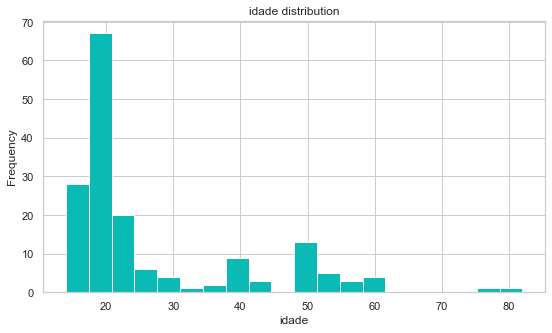

In [60]:
for c in categorias0:
    plot_hist(data,c)

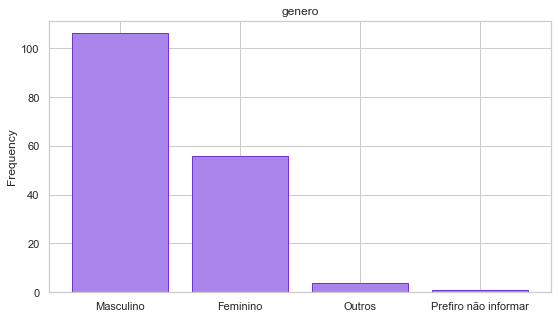

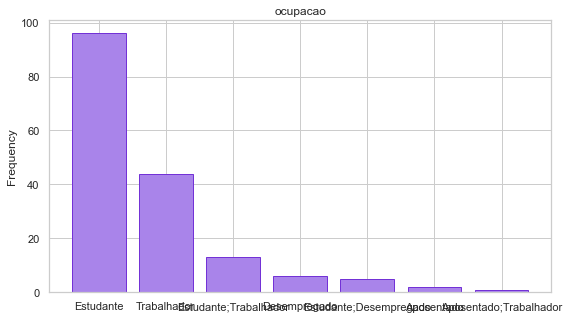

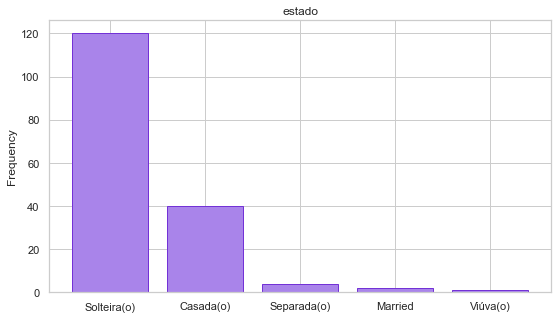

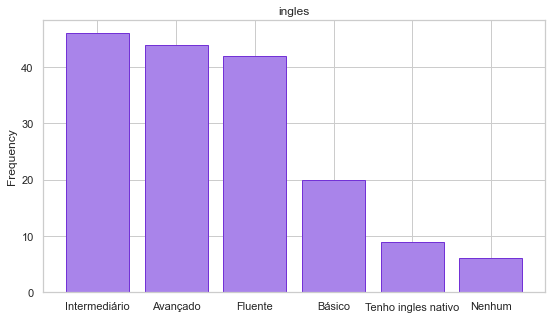

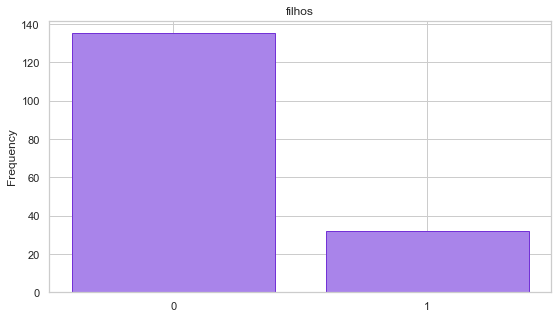

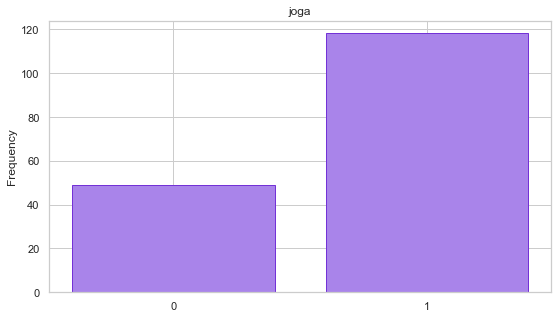

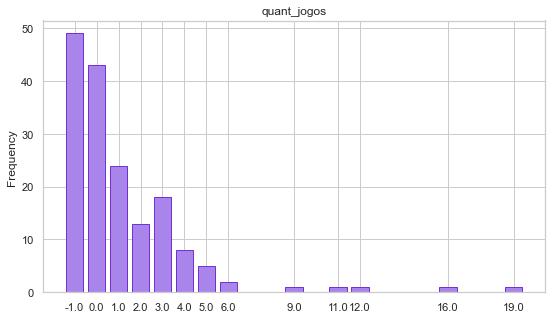

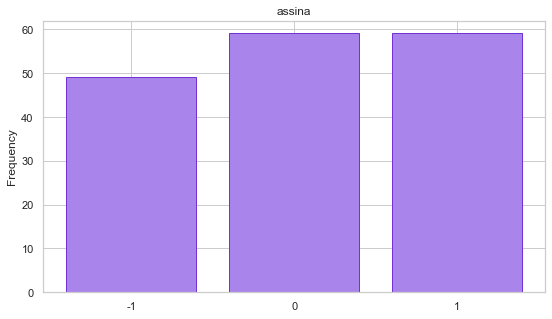

In [61]:
for c in categorias1:
    plot_bar(data,c)

In [62]:
idade=px.histogram(data, x='idade',y="count")
joga=px.histogram(data, x="idade", color="joga")
sexo_gostoso=px.pie(data, values='count', names='genero')

> Segundo o grafico pessoas mais velhas nao jogam muito

In [63]:
sexo_gostoso.show()

In [64]:
joga.show()

### Editando Ocupacoes

In [65]:
data['ocupacao'].value_counts()

Estudante                 96
Trabalhador               44
Estudante;Trabalhador     13
Desempregado               6
Estudante;Desempregado     5
Aposentado                 2
Aposentado;Trabalhador     1
Name: ocupacao, dtype: int64

In [66]:
# comparando Estudante;Desempregado com Estudante;Trabalhador

array = ["Estudante;Desempregado","Estudante;Trabalhador"]

Estudantes=data.loc[data['ocupacao'].isin(array)] # cria um df so com estudantes;desempregado e estudante;trabalhador

arrayEmprego = ["Estudante","Trabalhador"]

Emprego=data.loc[data['ocupacao'].isin(arrayEmprego)]# cria um df so com estudantes e trabalhador

arrayAposentado = ["Aposentado;Trabalhador","Aposentado"]

Aposentado=data.loc[data['ocupacao'].isin(arrayAposentado)]# cria um df so com aposentado;trabalhador e aposentado


In [67]:
data.head(3)

,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga,count
0,20,Feminino,Estudante,Solteira(o),Fluente,0,1,0.0,Ação/Aventura,Mídia digital,Indiferente,0,-1,Não pagaria,1.0
1,20,Masculino,Estudante,Solteira(o),Fluente,0,1,1.0,Ação/Aventura;Estratégia;RPG;Simulação,Mídia física,Desconto;Duração;Preço;Qualidade,0,-1,10 a 30,1.0
2,20,Feminino,Estudante,Solteira(o),Intermediário,0,1,1.0,Ação/Aventura;FPS;Simulação,Indiferente,Duração;Preço;Qualidade,0,-1,10 a 30,1.0


### Vendo a distribuicao dos dados

In [68]:
for c in categorias1:

    print(data[c].value_counts(1)) #ver dados bem distribuidos 
    

Masculino               0.634731
Feminino                0.335329
Outros                  0.023952
Prefiro não informar    0.005988
Name: genero, dtype: float64
Estudante                 0.574850
Trabalhador               0.263473
Estudante;Trabalhador     0.077844
Desempregado              0.035928
Estudante;Desempregado    0.029940
Aposentado                0.011976
Aposentado;Trabalhador    0.005988
Name: ocupacao, dtype: float64
Solteira(o)    0.718563
Casada(o)      0.239521
Separada(o)    0.023952
Married        0.011976
Viúva(o)       0.005988
Name: estado, dtype: float64
Intermediário          0.275449
Avançado               0.263473
Fluente                0.251497
Básico                 0.119760
Tenho ingles nativo    0.053892
Nenhum                 0.035928
Name: ingles, dtype: float64
0    0.808383
1    0.191617
Name: filhos, dtype: float64
1    0.706587
0    0.293413
Name: joga, dtype: float64
-1.0     0.293413
 0.0     0.257485
 1.0     0.143713
 3.0     0.107784
 2.0     

### Nivel de ingles influencia se a pessoa joga ?
- conclusao (ingles)

In [69]:
tempdf=data.groupby(['ingles','joga']).joga.count().unstack().fillna(0)
tempdf['total']=data['ingles'].value_counts()
tempdf['0 em %']=tempdf[0]/tempdf['total']*100
tempdf['1 em %']=tempdf[1]/tempdf['total']*100
tempdf

joga,0,1,total,0 em %,1 em %
ingles,,,,,
Avançado,15.0,29.0,44,34.090909,65.909091
Básico,11.0,9.0,20,55.000000,45.000000
Fluente,7.0,35.0,42,16.666667,83.333333
Intermediário,14.0,32.0,46,30.434783,69.565217
Nenhum,2.0,4.0,6,33.333333,66.666667
Tenho ingles nativo,0.0,9.0,9,0.000000,100.000000



> quanto mais a pessoa sabe ingles mais provavel dela gostar de jogar videogame

### Olhando categoria de jogos

In [70]:
tempdf=data['fav_jogos']
test=str(tempdf[1]).split(";")
categorias=[]
contar = []


for string in tempdf:
  escolhas_usuario = str(string).split(";")

  for nova_categoria in escolhas_usuario:
    if(nova_categoria!='-1'):         #exclue o nan
      
      # gambiarra estratégica
      if(nova_categoria == 'Estrategia'):
        nova_categoria = "Estratégia"

      if(not(nova_categoria in categorias)):
        categorias.append(nova_categoria)
        contar.append(1)
      else:
        num=categorias.index(nova_categoria) #descobre a posicao da categoria
        contar[num]+=1
print(categorias)
print(contar)



zip_iterator = zip(categorias, contar)
FavJogos = dict(zip_iterator)

del(FavJogos['OUTER WILDS'])
del(FavJogos['Sandbox'])
del(FavJogos['Jogos hype'])
del(FavJogos['Mundo aberto '])
del(FavJogos['Mostly multiplayer'])
del(FavJogos['ritmo'])
del(FavJogos['Cozinhar'])
del(FavJogos['Visual Novels'])
del(FavJogos['Survival'])
del(FavJogos['Roguelike'])

print(FavJogos)

['Ação/Aventura', 'Estratégia', 'RPG', 'Simulação', 'FPS', 'Battle Royale', 'Corrida', 'Luta', 'Roguelike', 'Esporte', 'MOBA', 'Terror', 'OUTER WILDS', 'Sandbox', 'Jogos hype', 'Mundo aberto ', 'Visual Novels', 'ritmo', 'Cozinhar', 'Mostly multiplayer', 'Survival']
[78, 52, 61, 38, 60, 21, 26, 27, 1, 23, 19, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1]
{'Ação/Aventura': 78, 'Estratégia': 52, 'RPG': 61, 'Simulação': 38, 'FPS': 60, 'Battle Royale': 21, 'Corrida': 26, 'Luta': 27, 'Esporte': 23, 'MOBA': 19, 'Terror': 21}


### Plotando graficos
- conclusao (quant_jogos)

[Text(0.5, 1.0, 'assinatura')]

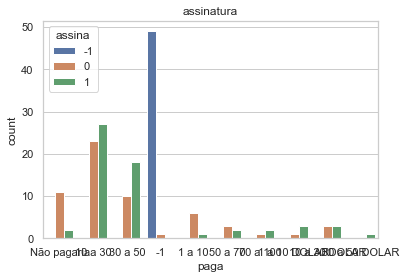

In [71]:
sns.countplot(x='paga', data=data, hue='assina').set(title='assinatura')

[Text(0.5, 1.0, 'ingles_nivel')]

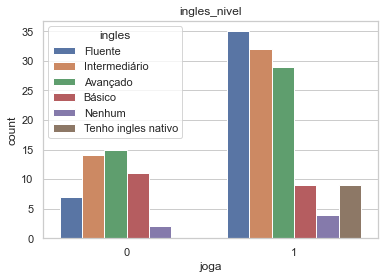

In [72]:

sns.countplot(x='joga', data=data, hue='ingles').set(title='ingles_nivel')


[Text(0.5, 1.0, 'Quant_assina')]

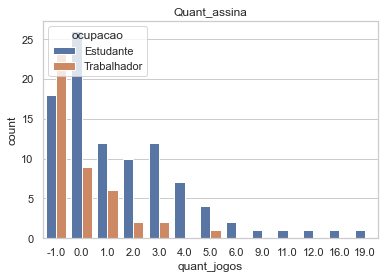

In [73]:

sns.countplot(x='quant_jogos', data=Emprego, hue='ocupacao').set(title='Quant_assina')
#maioria dos consumidores sao estudantes


> Estudantes compram mais jogos

## Separando df para comparação
> editar
- GAMER
- CRINGE
- Assinante

In [74]:
#editar
dataCRINGE=data
dataGAMER=data

### Data Assinante

In [75]:
dataAssinantes = data
dataAssinantes = dataAssinantes.drop(dataAssinantes[dataAssinantes.assina == 0].index)
dataAssinantes = dataAssinantes.drop(dataAssinantes[dataAssinantes.quais == -1].index)
dataAssinantes.dropna(subset = ["assina"], inplace=True)

DataAssinamCategoria = dataAssinantes['fav_jogos']
tempdf = DataAssinamCategoria

### Conta as categorias dos assinantes e transforma em 2 vetores

In [76]:
CategoriaJogos=[]
CategoriaJogosValor = []

for x in tempdf.index:
  strCategoria = str(tempdf[x]).split(";")
  for c in strCategoria:
      if(not(c in CategoriaJogos)):
          CategoriaJogos.append(c)
          CategoriaJogosValor.append(1)
      else:
        CategoriaJogosValor[CategoriaJogos.index(c)] += 1

MaioresValores = []
MaioresCategorias = []

for i in range(10):

  IndiceMaiorValor = CategoriaJogosValor.index(max(CategoriaJogosValor))
  MaioresValores.append(int(CategoriaJogosValor.pop(IndiceMaiorValor))) 
  MaioresCategorias.append(CategoriaJogos.pop(IndiceMaiorValor))

  ```print("%d %s \n" % (MaioresValores[i],MaioresCategorias[i]))```

### Plotando Categorias favorita dos Assinantes

C:\Users\guerr\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



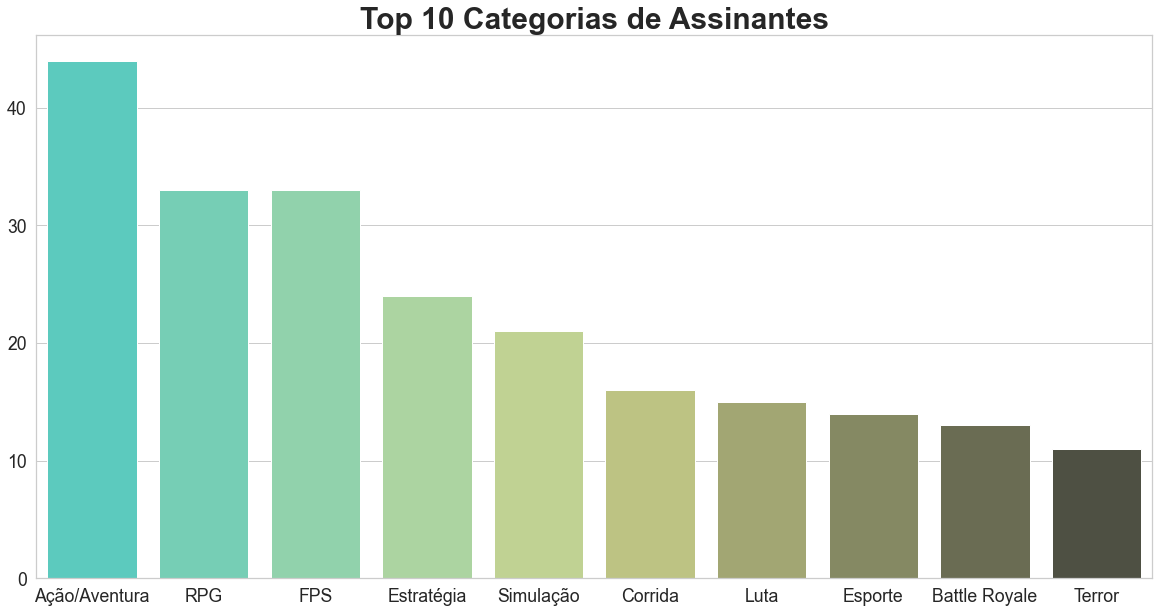

In [139]:

sns.set(rc = {'figure.figsize':(20,10)},font_scale=1.6,style="whitegrid")
plt.title("Top 10 Categorias de Assinantes",weight="bold").set_fontsize('30')
sns.barplot(MaioresCategorias, MaioresValores, palette="rainbow_d")

plt.show()

## OLHAR depois


[Text(0.5, 1.0, 'assinatura')]

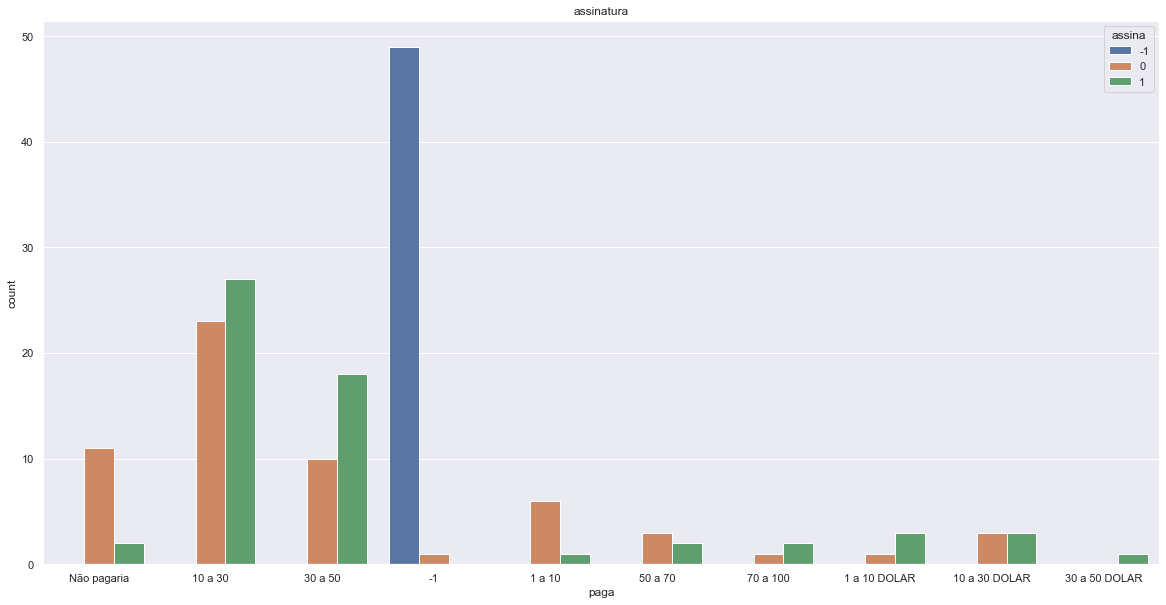

In [79]:
sns.countplot(x='paga', data=data, hue='assina').set(title='assinatura')

[Text(0.5, 1.0, 'ingles_nivel')]

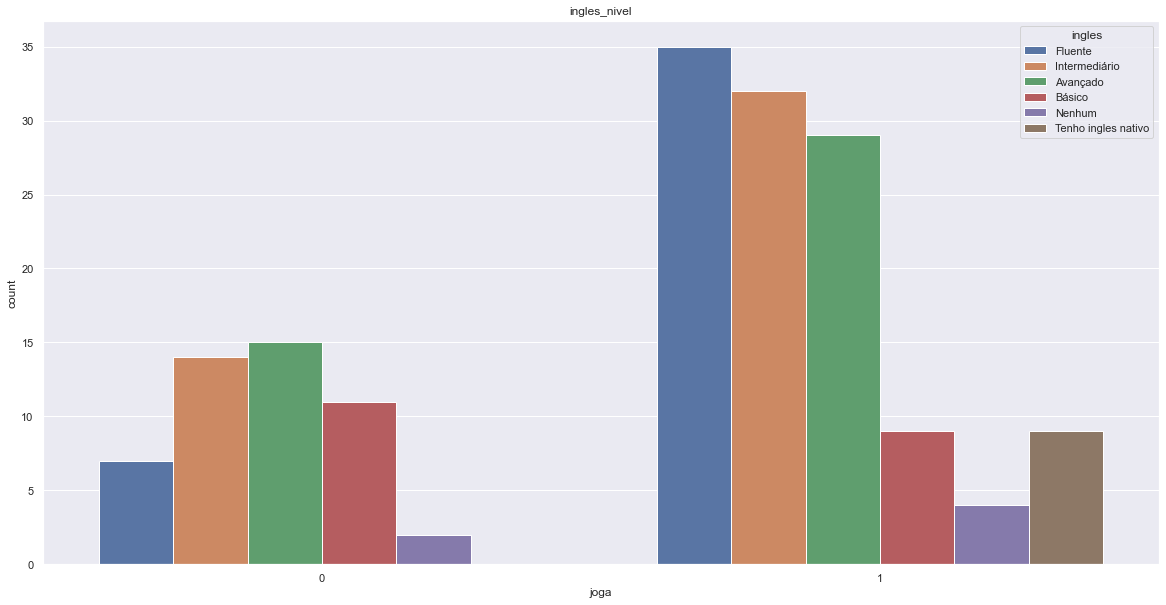

In [80]:
sns.countplot(x='joga', data=data, hue='ingles').set(title='ingles_nivel')